# Implementação de rede neural com back-propagation para problema simples de regressão

Baseado no tutorial ["How to Code a Neural Network with Backpropagation In Python (from scratch)"](https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/).


In [10]:
from random import random

def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

def print_net(net):
    for i, layer in enumerate(net):
        print("Camada {}".format(i+1) if i==0 else "Camada de saída")
        for j, neuron in enumerate(layer):
            output = ", Saída: {}".format(neuron["output"]) if "output" in neuron else ""
            delta = ", Delta (erro): {}".format(neuron["delta"]) if "delta" in neuron else ""
            print("Neurônio {}, Pesos + Bias: ".format(j), neuron["weights"], output, delta)

net = initialize_network(1, 5, 1)
print_net(net)

Camada 1
Neurônio 0, Pesos + Bias:  [0.6768600325963625, 0.023060785101889136]  
Neurônio 1, Pesos + Bias:  [0.6126348976481801, 0.6042254708148717]  
Neurônio 2, Pesos + Bias:  [0.25498030670979677, 0.6228442341853454]  
Neurônio 3, Pesos + Bias:  [0.41858318186977117, 0.43391855803862056]  
Neurônio 4, Pesos + Bias:  [0.6914204690732947, 0.38795400867220853]  
Camada de saída
Neurônio 0, Pesos + Bias:  [0.2267503075721331, 0.5054916108727749, 0.5756132399503514, 0.6853821938098421, 0.2933165932525508, 0.9534848218211619]  


In [11]:
import numpy as np

def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

weights = np.array([2, 4]) # O último é o bias
input = np.array([2])
print("Somatório neurônio: ", activate(weights, input))

Somatório neurônio:  8


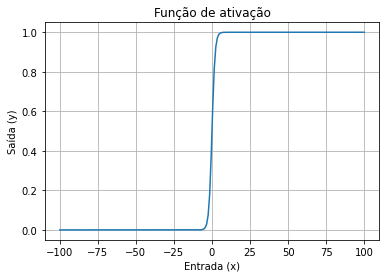

In [12]:
import matplotlib.pyplot as plt

def transfer(activation):
	return 1.0 / (1.0 + np.exp(-activation))

plt.figure()
x_transfer = np.linspace(-100,100,200)
y_transfer = transfer(x_transfer)
plt.title("Função de ativação")
plt.xlabel("Entrada (x)")
plt.ylabel("Saída (y)")
plt.grid()
plt.plot(x_transfer,y_transfer)
plt.show()

In [13]:
#Remover função de ativação da ultima camada se formmos fazer regressão
def forward_propagate(network, row):
	inputs = row
	for i, layer in enumerate(network):
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs
	
output = forward_propagate(net, input)
print ("Saída da rede neural:", output)

Saída da rede neural: [0.9422082614850101]


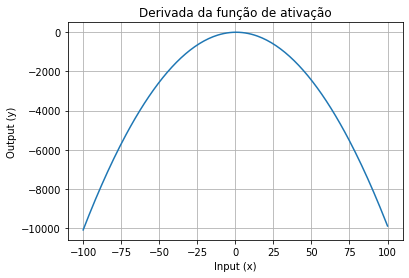

In [14]:
def transfer_derivative(output):
	return output * (1.0 - output)

plt.figure()
x_transfer_derivative = np.linspace(-100,100,200)
y_transfer_derivative = transfer_derivative(x_transfer_derivative)
plt.title("Derivada da função de ativação")
plt.xlabel("Input (x)")
plt.ylabel("Output (y)")
plt.grid()
plt.plot(x_transfer_derivative,y_transfer_derivative)
plt.show()

In [15]:
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

print(input)
expected = [5]
backward_propagate_error(net, expected)
print_net(net)

[2]
Camada 1
Neurônio 0, Pesos + Bias:  [0.6768600325963625, 0.023060785101889136] , Saída: 0.7984734930491006 , Delta (erro): 0.008062003575080632
Neurônio 1, Pesos + Bias:  [0.6126348976481801, 0.6042254708148717] , Saída: 0.8617015876804242 , Delta (erro): 0.01331038019555514
Neurônio 2, Pesos + Bias:  [0.25498030670979677, 0.6228442341853454] , Saída: 0.7563561522703421 , Delta (erro): 0.023437699883771774
Neurônio 3, Pesos + Bias:  [0.41858318186977117, 0.43391855803862056] , Saída: 0.7809284120611155 , Delta (erro): 0.025907918257445123
Neurônio 4, Pesos + Bias:  [0.6914204690732947, 0.38795400867220853] , Saída: 0.8545565026047136 , Delta (erro): 0.008055159521536345
Camada de saída
Neurônio 0, Pesos + Bias:  [0.2267503075721331, 0.5054916108727749, 0.5756132399503514, 0.6853821938098421, 0.2933165932525508, 0.9534848218211619] , Saída: 0.9422082614850101 , Delta (erro): 0.22095428117526897


In [16]:
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[-1:]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']

learning_rate = 0.3
update_weights(net, input, learning_rate)
print_net(net)

Camada 1
Neurônio 0, Pesos + Bias:  [0.6816972347414109, 0.025479386174413327] , Saída: 0.7984734930491006 , Delta (erro): 0.008062003575080632
Neurônio 1, Pesos + Bias:  [0.6206211257655132, 0.6082185848735382] , Saída: 0.8617015876804242 , Delta (erro): 0.01331038019555514
Neurônio 2, Pesos + Bias:  [0.26904292664005985, 0.629875544150477] , Saída: 0.7563561522703421 , Delta (erro): 0.023437699883771774
Neurônio 3, Pesos + Bias:  [0.4341279328242382, 0.4416909335158541] , Saída: 0.7809284120611155 , Delta (erro): 0.025907918257445123
Neurônio 4, Pesos + Bias:  [0.6962535647862165, 0.3903705565286694] , Saída: 0.8545565026047136 , Delta (erro): 0.008055159521536345
Camada de saída
Neurônio 0, Pesos + Bias:  [0.27967814858038414, 0.5626106073408298, 0.6257492789315671, 0.7371470365907346, 0.3499619685795537, 1.0197711061737427] , Saída: 0.9422082614850101 , Delta (erro): 0.22095428117526897


In [17]:
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs

print(predict(net, input))

[0.9563599548447181]


## Preparação da base de dados

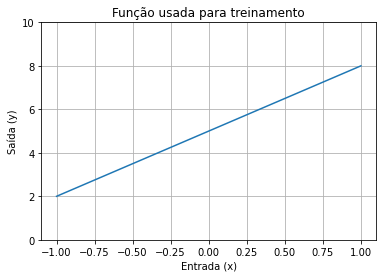

In [18]:
# Função que vamos tentar aproximar
n = 10 # Número de registros na base de dados
x = np.linspace(-1,1,n)
y = 3*x+5

plt.figure()
plt.title("Função usada para treinamento")
plt.xlabel("Entrada (x)")
plt.ylabel("Saída (y)")
plt.ylim([0,10])
plt.grid()
plt.plot(x,y)
plt.show()

In [22]:
# Divisão base de dados para treino e teste
from sklearn.model_selection import train_test_split

test_size = 0.1
x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1,1), y, test_size=test_size)
print("Dimensão entradas para treino = {}\nDimensão saídas para treino = {}\n\nDimensão entradas para teste = {}\nDimensão saídas para teste = {}\n".format(x_train.shape[0], y_train.shape[0], x_test.shape[0], y_test.shape[0]))

Dimensão entradas para treino = 9
Dimensão saídas para treino = 9

Dimensão entradas para teste = 1
Dimensão saídas para teste = 1



## Treinamento da rede

In [20]:
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>Época=%d, Taxa de aprendizado=%.3f, Erro=%.3f' % (epoch, l_rate, sum_error))